In [79]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal as signal
from math import *
from matplotlib import pyplot as plt
import scipy.io
import os
import scipy.io.wavfile as wav

from scipy.fftpack import fft
from scipy.signal import lfilter
from scipy.signal import ellip
##Function to convert the mat lab data into csv for pandas

def convert_to_CSV(data,filename):
    for i in data:
        if '__' not in i and 'readme' not in i:
            np.savetxt((filename+".csv"),data[i],delimiter=',')

#scipy to load matlab files
#takes in matlab file path name
def load(matlabfile):
    matdata = scipy.io.loadmat(matlabfile)
    data = matdata['data']
    return data

#normal plotting function
#takes in data we want to plot, name of the file
#saves it as a png file
def plot(data, filename):
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.savefig(filename+".png",bbox_inches='tight')
    plt.show()
    

#butter filter
#data is the thing we want to filter
#to edit the params of the butter filter, change the function variables inside here
def butter(data , filename):
    b, a = signal.butter(20, .1, 'low', analog=False)#our defult values
    filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
    fil = np.asarray(filtered)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.savefig("Butter_"+filename+".png",bbox_inches='tight')
    plt.show()
    
    return fil

#simple IIR filter
def IIR(data, filename):
    n = 1000  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    fil = lfilter(b,a,data)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.savefig("IIR_"+filename+".png",bbox_inches='tight')
    plt.show()
    
    return fil

#ellip filter
def ellip(data, filename):
    b, a = signal.ellip(20, 5, 40, .3, 'low', analog=True)
    filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
    fil = np.asarray(filtered)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.savefig("ellip_"+filename+".png",bbox_inches='tight')
    plt.show()
    
    return fil
#plots fft and saves it as png
#takes in the wav file name, the name we want our png to be
def fft_fig(wavfilename, filename):
    fs, data = wav.read(wavfilename+".wav")
    a = data.T 
    b=[(ele/2**8.)*2-1 for ele in a] 
    c = fft(b) 

    plt.figure(figsize=(20,10))
    plt.axis([0,fs/2,0,abs(max(c))])
    plt.plot(abs(c),'r') 
    plt.savefig("fft_"+filename+".png",bbox_inches='tight')
    plt.show()
    

#Takes in our data, saves it as a wav file
def save_wav(data, filename):
    wav.write(filename+".wav", 44100, ((data + data.min()) * (2 ** 15) / data.ptp()).astype(np.int16))

#plays the sound using os
#takes in wav file name
def play(filename):
    os.system(filename)

Testing Female 1 in metal

In [73]:
female1 = load('female1_metal_A_1.mat')

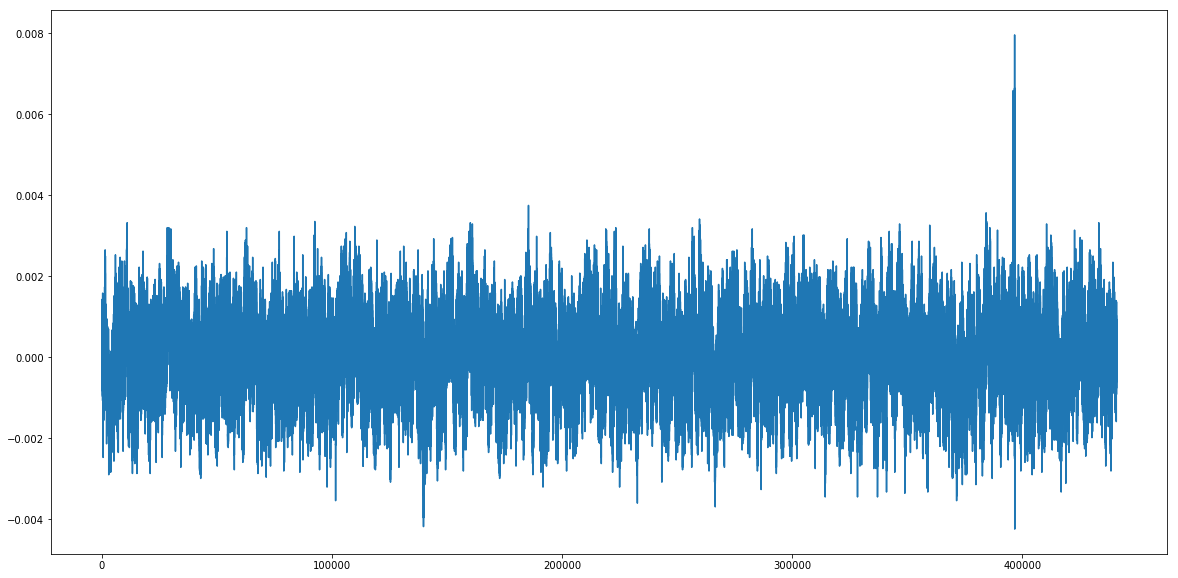

In [74]:
plot(female1, "female1")
save_wav(female1, "female1_metal")

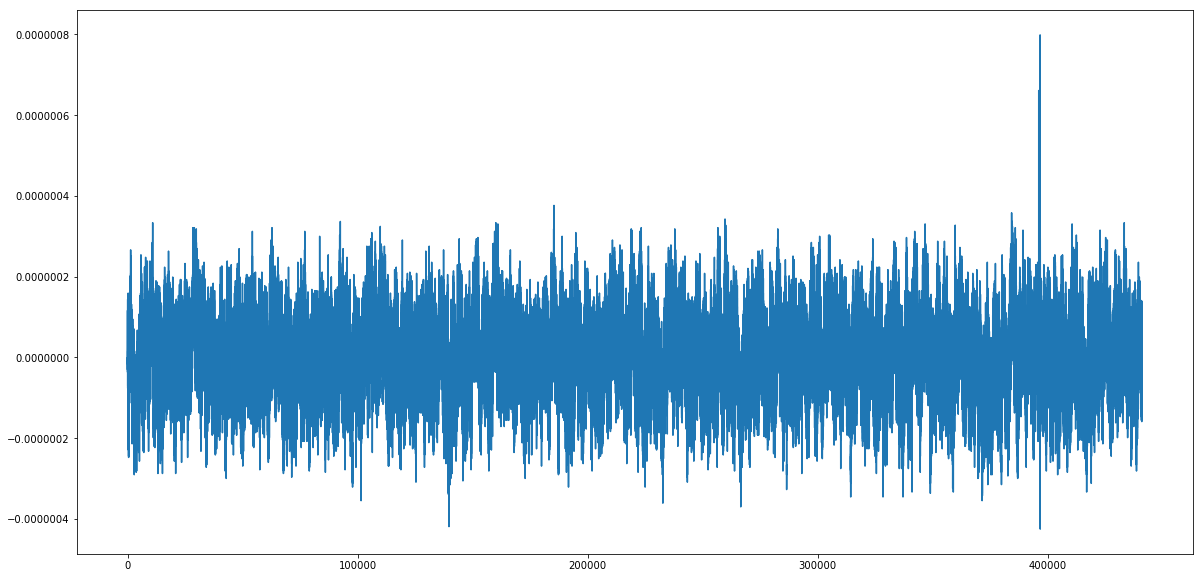

In [85]:
#butter_female1 = butter(female1, "female1")
#save_wav(butter_female1, "butter_female1_metal")
#IIR_female1 = IIR(female1, "female1")
#save_wav(IIR_female1, "IIR_female1")
ellip_female1 = ellip(female1, "female1")
save_wav(ellip_female1, "ellip_female1")

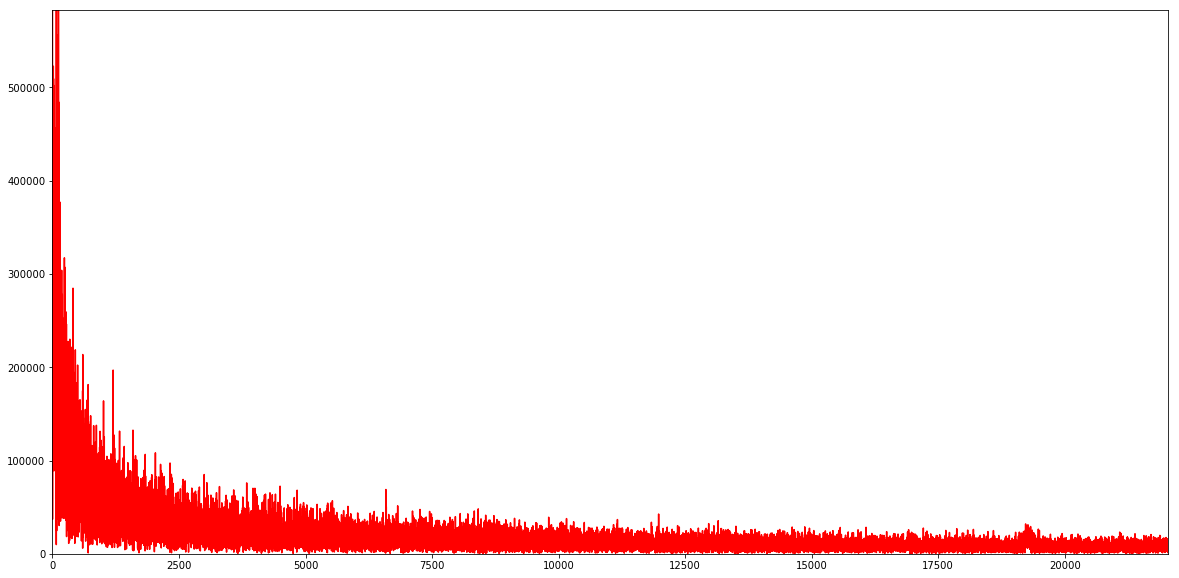

In [82]:
fft_fig('female1_metal',"female1_metal")

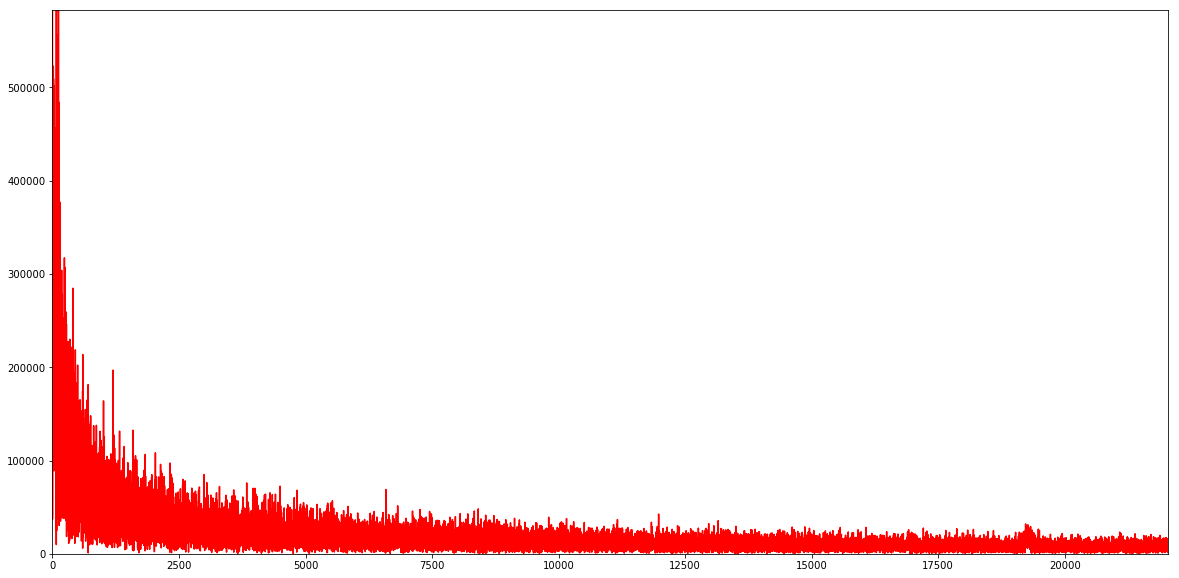

In [86]:
#fft_fig('butter_female1_metal','butter_female1_metal')
#fft_fig('IIR_female1','IIR_female1_metal')
fft_fig('ellip_female1', 'ellip_female1')

In [70]:
#butter_female1
IIR_female1

array([[ -7.62939453e-06],
       [  0.00000000e+00],
       [ -1.52587891e-05],
       ..., 
       [  2.59399414e-05],
       [  2.44140625e-05],
       [  2.74658203e-05]])

In [71]:
female1

array([[-0.00015259],
       [ 0.        ],
       [-0.00030518],
       ..., 
       [ 0.0005188 ],
       [ 0.00048828],
       [ 0.00054932]])